In [1]:
from pathlib import Path
import sys

ROOT = Path.cwd().parent           # raíz del repo (carpeta que tiene src/ y notebooks/)
SRC  = ROOT / "src"
DATA = ROOT / "data"
DATA.mkdir(exist_ok=True)

print("CWD (notebook):", Path.cwd())
print("Repo root:     ", ROOT)
print("Python exe:    ", sys.executable)


CWD (notebook): /Users/santiagocollazof/Documents/volmicro/notebooks
Repo root:      /Users/santiagocollazof/Documents/volmicro
Python exe:     /Users/santiagocollazof/miniforge3/envs/volmicro/bin/python


In [2]:
import importlib.metadata as importlib_metadata

def safe_version(pkg, attr="__version__"):
    """Devuelve la versión de un paquete sin romper si no tiene __version__."""
    try:
        mod = globals().get(pkg)
        if mod and hasattr(mod, attr):
            return getattr(mod, attr)
        return importlib_metadata.version(pkg)
    except Exception:
        return "unknown"

versions = {
    "numpy": safe_version("numpy"),
    "pandas": safe_version("pandas"),
    "matplotlib": safe_version("matplotlib"),
    "scipy": safe_version("scipy"),
    "scikit-learn": safe_version("sklearn"),
    "statsmodels": safe_version("statsmodels"),
    "yfinance": safe_version("yfinance"),
    "polars": safe_version("polars"),
    "pyarrow": safe_version("pyarrow"),
    "fastparquet": safe_version("fastparquet"),
    "orjson": safe_version("orjson"),
    "ccxt": safe_version("ccxt"),
    "python-dotenv": safe_version("python-dotenv"),
    "ta": safe_version("ta"),
}

print("✅ Imports OK")
versions


✅ Imports OK


{'numpy': '2.3.4',
 'pandas': '2.3.3',
 'matplotlib': '3.10.7',
 'scipy': '1.16.2',
 'scikit-learn': 'unknown',
 'statsmodels': '0.14.5',
 'yfinance': '0.2.57',
 'polars': '1.34.0',
 'pyarrow': '21.0.0',
 'fastparquet': '2024.11.0',
 'orjson': '3.11.3',
 'ccxt': '4.5.12',
 'python-dotenv': '1.1.1',
 'ta': '0.11.0'}

In [3]:
# Si ya hiciste `pip install -e .` debería funcionar directo:
try:
    import volmicro
    print("volmicro OK →", volmicro.__file__)
except ModuleNotFoundError:
    # Fallback: añadir src/ al sys.path (por si aún no instalaste en editable)
    if str(SRC) not in sys.path:
        sys.path.append(str(SRC))
    import volmicro
    print("volmicro OK (via sys.path) →", volmicro.__file__)


volmicro OK → /Users/santiagocollazof/Documents/volmicro/src/volmicro/__init__.py


In [4]:
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf

# Intentar usar tu loader si existe
df = None
try:
    from volmicro.data.loaders import load_data  # si implementaste esta función
    df = load_data(source="yfinance", symbol="BTC-USD", interval="1d",
                   start="2023-01-01", end=None)
    print("Datos cargados con volmicro.data.loaders.load_data")
except Exception as e:
    print("No se pudo usar volmicro.loaders (ok):", e)
    print("→ Fallback a yfinance.Ticker().history()")
    end = datetime.utcnow().date()
    start = (end - timedelta(days=365)).isoformat()
    df = yf.Ticker("BTC-USD").history(start=start, end=end.isoformat(), interval="1d")

assert isinstance(df, pd.DataFrame) and not df.empty, "❌ Descarga vacía"
df.head()


Datos cargados con volmicro.data.loaders.load_data


,timestamp,open,high,low,close,volume
0,2023-01-01 00:00:00+00:00,16547.914062,16630.439453,16521.234375,16625.080078,9244361700
1,2023-01-02 00:00:00+00:00,16625.509766,16759.343750,16572.228516,16688.470703,12097775227
2,2023-01-03 00:00:00+00:00,16688.847656,16760.447266,16622.371094,16679.857422,13903079207
3,2023-01-04 00:00:00+00:00,16680.205078,16964.585938,16667.763672,16863.238281,18421743322
4,2023-01-05 00:00:00+00:00,16863.472656,16884.021484,16790.283203,16836.736328,13692758566


Filas: 1027 | columnas: ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'ret_1d', 'ret_5d']


,timestamp,open,high,low,close,volume,ret_1d,ret_5d
1024,2025-10-21 00:00:00+00:00,110587.632812,113996.343750,107534.75000,108476.890625,101194375480,-0.019098,0.002688
1025,2025-10-22 00:00:00+00:00,108491.531250,109115.132812,106778.00000,107688.585938,80807013218,-0.007267,0.011466
1026,2025-10-23 00:00:00+00:00,107609.437500,111254.343750,107598.21875,110445.828125,59969798144,0.025604,0.030295


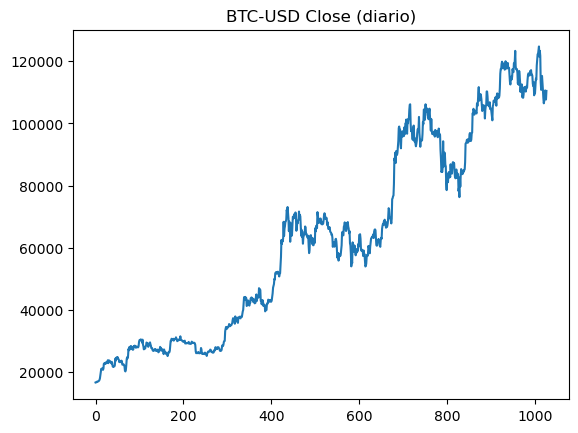

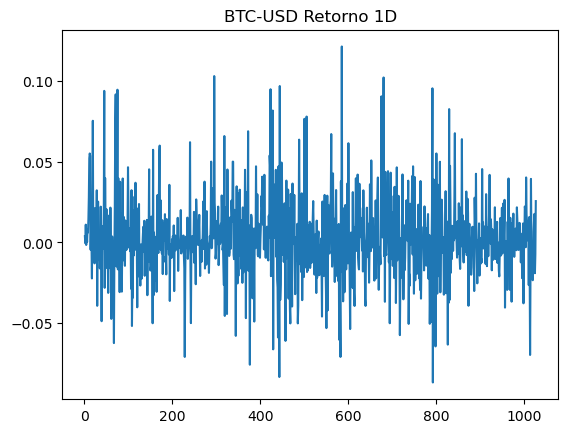

In [8]:
import matplotlib.pyplot as plt

df_feat = df.copy()
if "close" in df_feat:
    df_feat["ret_1d"] = df_feat["close"].pct_change()
    df_feat["ret_5d"] = df_feat["close"].pct_change(5)

print("Filas:", len(df_feat), "| columnas:", list(df_feat.columns))
display(df_feat.tail(3))

# Gráfico de cierre y retornos
ax = df_feat["close"].plot(title="BTC-USD Close (diario)")
plt.show()

df_feat["ret_1d"].plot(title="BTC-USD Retorno 1D")
plt.show()
